In [1]:
#A1
import pandas as pd
import numpy as np

# Load and inspect the dataset
data = pd.read_csv(r"C:\Users\Dell\Downloads\DCT_withoutduplicate 7.csv")

# Basic inspection
print(data.head())
print(data.info())
print(data.describe())

# Preprocessing: assuming 'LABEL' is the target column
X = data.drop(columns=['LABEL'])  # Drop the target column 'LABEL'
y = (data['LABEL'] > 3370).astype(int)  # Binary classification based on a threshold

# Add bias term to inputs
X_bias = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones for bias

# Ensure your data and paths are correct for further processing


             0           1           2            3           4            5  \
0  38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1  29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2  29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3  29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4  29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   

            6           7          8           9  ...         187         188  \
0 -454.999177 -201.722600 -42.369585 -277.176688  ...  225.163042  375.848590   
1  144.818556   38.937042  56.479929   79.150981  ... -110.815428 -112.520155   
2  145.774409   42.363949  56.631487   84.338212  ... -111.628888 -113.504989   
3   49.023922   24.901637  47.767988   42.011626  ...   -5.242054  -79.615224   
4   49.680814   22.071049  48.720409   37.361647  ...   -5.661566  -82.903805   

          189         190       

Epoch 0, Error: 261
Epoch 1, Error: 30
Epoch 2, Error: 22
Epoch 3, Error: 15
Epoch 4, Error: 25
Epoch 5, Error: 23
Epoch 6, Error: 20
Epoch 7, Error: 24
Epoch 8, Error: 27
Epoch 9, Error: 23
Epoch 10, Error: 20
Epoch 11, Error: 24
Epoch 12, Error: 27
Epoch 13, Error: 29
Epoch 14, Error: 23
Epoch 15, Error: 22
Epoch 16, Error: 23
Epoch 17, Error: 25
Epoch 18, Error: 27
Epoch 19, Error: 26
Epoch 20, Error: 24
Epoch 21, Error: 23
Epoch 22, Error: 30
Epoch 23, Error: 27
Epoch 24, Error: 24
Epoch 25, Error: 23
Epoch 26, Error: 28
Epoch 27, Error: 13
Epoch 28, Error: 16
Epoch 29, Error: 19
Epoch 30, Error: 20
Epoch 31, Error: 22
Epoch 32, Error: 20
Epoch 33, Error: 22
Epoch 34, Error: 20
Epoch 35, Error: 26
Epoch 36, Error: 26
Epoch 37, Error: 22
Epoch 38, Error: 15
Epoch 39, Error: 25
Epoch 40, Error: 29
Epoch 41, Error: 23
Epoch 42, Error: 22
Epoch 43, Error: 13
Epoch 44, Error: 20
Epoch 45, Error: 9
Epoch 46, Error: 22
Epoch 47, Error: 28
Epoch 48, Error: 13
Epoch 49, Error: 16
Epoch 50, 

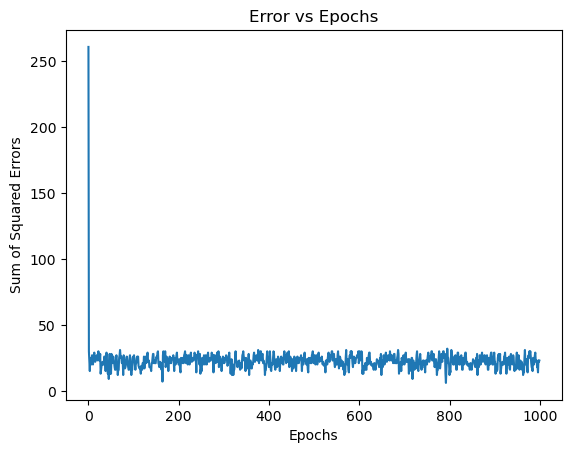

In [9]:
#A2
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
learning_rate = 0.05
W = np.array([10, 0.2, -0.75])  # Initial weights: W0 (bias), W1, W2

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Summation unit: calculates the weighted sum including bias
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Error comparator function
def compute_error(target, output):
    return target - output

# Training perceptron using AND gate logic from the dataset
def train_perceptron(X, y, epochs=1000, convergence_threshold=0.002):
    global W  # Use the global weight vector
    errors = []  # To store the sum of squared errors at each epoch
    n_samples = X.shape[0]

    for epoch in range(epochs):
        sum_squared_error = 0
        
        for i in range(n_samples):
            inputs = np.insert(X[i], 0, 1)  # Insert bias term as the first input
            weighted_sum = summation_unit(inputs, W)
            output = step_activation(weighted_sum)
            
            # Calculate the error
            error = compute_error(y[i], output)
            sum_squared_error += error**2
            
            # Update weights
            W += learning_rate * error * inputs
        
        # Store the sum of squared errors
        errors.append(sum_squared_error)
        
        # Print debugging info
        print(f'Epoch {epoch}, Error: {sum_squared_error}')
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f'Converged at epoch {epoch}')
            break

    return errors

# Plot the error vs epochs graph
def plot_error_vs_epochs(errors):
    plt.plot(errors)
    plt.title('Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.show()

# Prepare dataset (assuming two input features for AND gate task)
X = data.iloc[:, [0, 1]].values  # Select two columns from your dataset as features
y = (data['LABEL'] > 3370).astype(int).values  # Binary target (as previously defined)

# Normalize input data to ensure proper convergence
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train the perceptron
errors = train_perceptron(X, y)

# Plot the errors over epochs
plot_error_vs_epochs(errors)


Epoch 0, Error: 261
Epoch 100, Error: 25
Epoch 200, Error: 20
Epoch 300, Error: 25
Epoch 400, Error: 18
Epoch 500, Error: 22
Epoch 600, Error: 25
Epoch 700, Error: 20
Epoch 800, Error: 12
Epoch 900, Error: 23


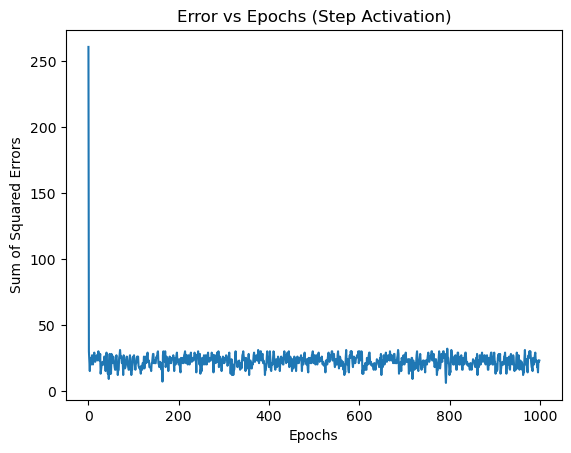

Epoch 0, Error: 1183
Epoch 100, Error: 1171
Epoch 200, Error: 1171
Epoch 300, Error: 1167
Epoch 400, Error: 1171
Epoch 500, Error: 1167
Epoch 600, Error: 1183
Epoch 700, Error: 1167
Epoch 800, Error: 1163
Epoch 900, Error: 1187


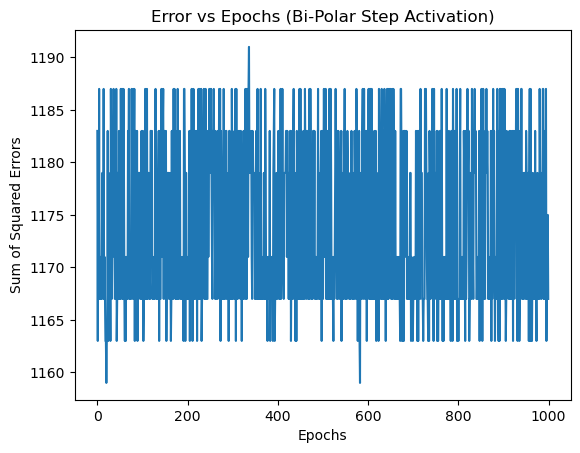

Epoch 0, Error: 281.0909002134871
Epoch 100, Error: 156.5588526788758
Epoch 200, Error: 156.5588526788758
Epoch 300, Error: 156.5588526788758
Epoch 400, Error: 156.5588526788758
Epoch 500, Error: 156.5588526788758
Epoch 600, Error: 156.5588526788758
Epoch 700, Error: 156.5588526788758
Epoch 800, Error: 156.5588526788758
Epoch 900, Error: 156.5588526788758


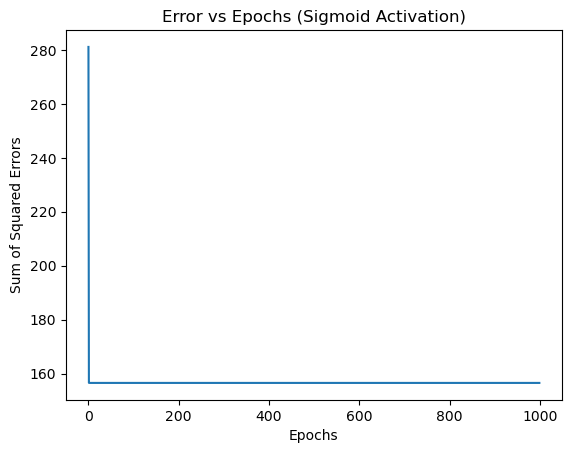

Epoch 0, Error: 1109.5349833937362
Epoch 100, Error: 23.646925425625145
Epoch 200, Error: 23.646925425625145
Epoch 300, Error: 23.646925425625145
Epoch 400, Error: 23.646925425625145
Epoch 500, Error: 23.646925425625145
Epoch 600, Error: 23.646925425625145
Epoch 700, Error: 23.646925425625145
Epoch 800, Error: 23.646925425625145
Epoch 900, Error: 23.646925425625145


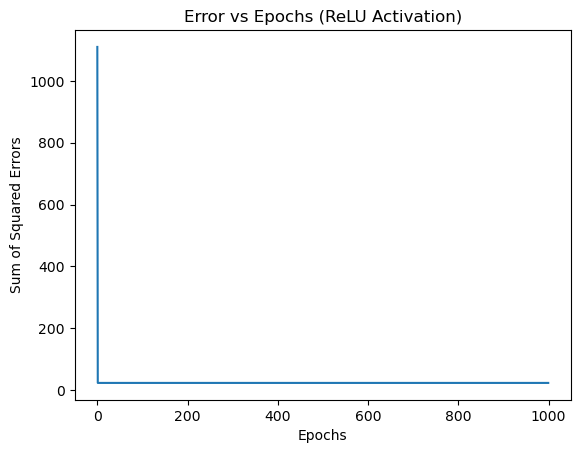

In [10]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
learning_rate = 0.05
initial_weights = np.array([10, 0.2, -0.75])  # Initial weights: W0 (bias), W1, W2

# Activation functions
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# Summation unit: calculates the weighted sum including bias
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Error comparator function
def compute_error(target, output):
    return target - output

# Train perceptron with the given activation function
def train_perceptron(X, y, activation_func, epochs=1000, convergence_threshold=0.002):
    W = initial_weights.copy()  # Use fresh weights for each activation function
    errors = []  # To store the sum of squared errors at each epoch
    n_samples = X.shape[0]

    for epoch in range(epochs):
        sum_squared_error = 0
        
        for i in range(n_samples):
            inputs = np.insert(X[i], 0, 1)  # Insert bias term as the first input
            weighted_sum = summation_unit(inputs, W)
            output = activation_func(weighted_sum)
            
            # Calculate the error
            error = compute_error(y[i], output)
            sum_squared_error += error**2
            
            # Update weights
            W += learning_rate * error * inputs
        
        # Store the sum of squared errors
        errors.append(sum_squared_error)
        
        # Print debugging info
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Error: {sum_squared_error}')
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f'Converged at epoch {epoch}')
            break

    return errors

# Plot the error vs epochs graph
def plot_error_vs_epochs(errors, title):
    plt.plot(errors)
    plt.title(f'Error vs Epochs ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.show()

# Prepare dataset (assuming two input features for AND gate task)
X = data.iloc[:, [0, 1]].values  # Select two columns from your dataset as features
y = (data['LABEL'] > 3370).astype(int).values  # Binary target (as previously defined)

# Normalize input data to ensure proper convergence
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train and plot for Step Activation
errors_step = train_perceptron(X, y, activation_func=step_activation)
plot_error_vs_epochs(errors_step, "Step Activation")

# Train and plot for Bi-Polar Step Activation
errors_bipolar_step = train_perceptron(X, y, activation_func=bipolar_step_activation)
plot_error_vs_epochs(errors_bipolar_step, "Bi-Polar Step Activation")

# Train and plot for Sigmoid Activation
errors_sigmoid = train_perceptron(X, y, activation_func=sigmoid_activation)
plot_error_vs_epochs(errors_sigmoid, "Sigmoid Activation")

# Train and plot for ReLU Activation
errors_relu = train_perceptron(X, y, activation_func=relu_activation)
plot_error_vs_epochs(errors_relu, "ReLU Activation")


Learning Rate: 0.1, Epochs to Converge: 1000
Learning Rate: 0.2, Epochs to Converge: 1000
Learning Rate: 0.3, Epochs to Converge: 1000
Learning Rate: 0.4, Epochs to Converge: 1000
Learning Rate: 0.5, Epochs to Converge: 1000
Learning Rate: 0.6, Epochs to Converge: 1000
Learning Rate: 0.7, Epochs to Converge: 1000
Learning Rate: 0.8, Epochs to Converge: 1000
Learning Rate: 0.9, Epochs to Converge: 1000
Learning Rate: 1.0, Epochs to Converge: 1000


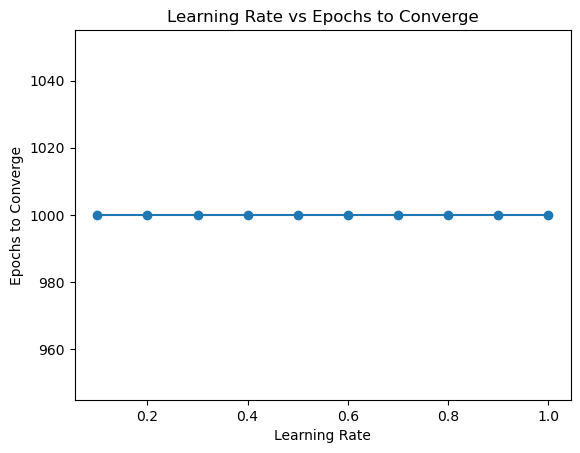

In [11]:
#A4
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights
initial_weights = np.array([10, 0.2, -0.75])  # Initial weights: W0 (bias), W1, W2

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Summation unit: calculates the weighted sum including bias
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Error comparator function
def compute_error(target, output):
    return target - output

# Train perceptron with the given learning rate
def train_perceptron_with_learning_rate(X, y, learning_rate, epochs=1000, convergence_threshold=0.002):
    W = initial_weights.copy()  # Use fresh weights for each learning rate
    n_samples = X.shape[0]

    for epoch in range(epochs):
        sum_squared_error = 0
        
        for i in range(n_samples):
            inputs = np.insert(X[i], 0, 1)  # Insert bias term as the first input
            weighted_sum = summation_unit(inputs, W)
            output = step_activation(weighted_sum)
            
            # Calculate the error
            error = compute_error(y[i], output)
            sum_squared_error += error**2
            
            # Update weights
            W += learning_rate * error * inputs
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            return epoch + 1  # Return the number of epochs it took to converge

    return epochs  # If it doesn't converge, return max epochs

# Plot learning rate vs number of epochs to converge
def plot_learning_rate_vs_epochs(learning_rates, epochs_to_converge):
    plt.plot(learning_rates, epochs_to_converge, marker='o')
    plt.title('Learning Rate vs Epochs to Converge')
    plt.xlabel('Learning Rate')
    plt.ylabel('Epochs to Converge')
    plt.xscale('linear')
    plt.show()

# Prepare dataset (assuming two input features for the task)
X = data.iloc[:, [0, 1]].values  # Select two columns from your dataset as features
y = (data['LABEL'] > 3370).astype(int).values  # Binary target (as previously defined)

# Normalize input data to ensure proper convergence
X = (X - X.mean(axis=0)) / X.std(axis=0)

# List of learning rates to experiment with
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Store the number of epochs taken to converge for each learning rate
epochs_to_converge = []

# Train perceptron for each learning rate and track the number of epochs to convergence
for lr in learning_rates:
    epochs = train_perceptron_with_learning_rate(X, y, learning_rate=lr)
    epochs_to_converge.append(epochs)
    print(f'Learning Rate: {lr}, Epochs to Converge: {epochs}')

# Plot the results
plot_learning_rate_vs_epochs(learning_rates, epochs_to_converge)


Epoch 0, Error: 2
Epoch 100, Error: 2
Epoch 200, Error: 2
Epoch 300, Error: 4
Epoch 400, Error: 4
Epoch 500, Error: 4
Epoch 600, Error: 4
Epoch 700, Error: 4
Epoch 800, Error: 4
Epoch 900, Error: 4


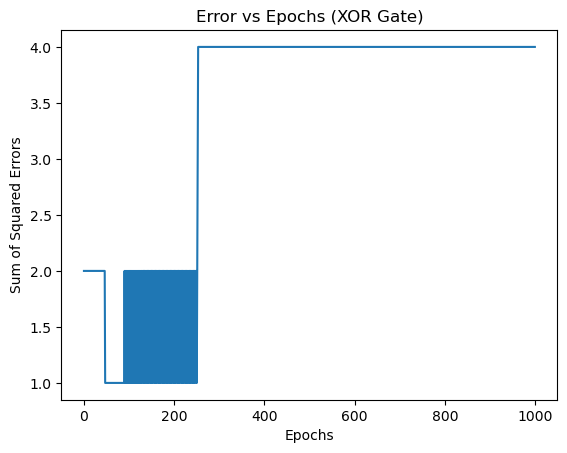

In [14]:
#A5
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights
learning_rate = 0.05
initial_weights = np.array([10, 0.2, -0.75])  # Initial weights: W0 (bias), W1, W2

# XOR logic dataset
# Input pairs (A, B) and corresponding XOR outputs (Z)
XOR_input = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

XOR_output = np.array([0, 1, 1, 0])  # XOR gate truth table

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Summation unit: calculates the weighted sum including bias
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Error comparator function
def compute_error(target, output):
    return target - output

# Train perceptron using XOR logic
def train_perceptron(X, y, epochs=1000, convergence_threshold=0.002):
    W = initial_weights.copy()  # Use fresh weights for each training
    errors = []  # To store the sum of squared errors at each epoch
    n_samples = X.shape[0]

    for epoch in range(epochs):
        sum_squared_error = 0
        
        for i in range(n_samples):
            inputs = np.insert(X[i], 0, 1)  # Insert bias term as the first input
            weighted_sum = summation_unit(inputs, W)
            output = step_activation(weighted_sum)
            
            # Calculate the error
            error = compute_error(y[i], output)
            sum_squared_error += error**2
            
            # Update weights
            W += learning_rate * error * inputs
        
        # Store the sum of squared errors
        errors.append(sum_squared_error)
        
        # Print debugging info
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Error: {sum_squared_error}')
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f'Converged at epoch {epoch}')
            break

    return errors

# Plot the error vs epochs graph
def plot_error_vs_epochs(errors):
    plt.plot(errors)
    plt.title('Error vs Epochs (XOR Gate)')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.show()

# Train the perceptron on XOR gate logic
errors = train_perceptron(XOR_input, XOR_output)

# Plot the errors over epochs
plot_error_vs_epochs(errors)


Epoch 0, Error: 5
Converged at epoch 29


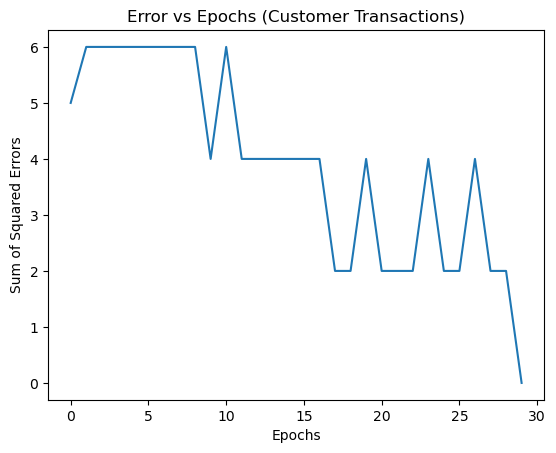

Final Weights: [ 9.95 -1.5   7.3  -0.9 ]


In [13]:
#A6
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
learning_rate = 0.05
initial_weights = np.array([10, 0.2, -0.75, 0.5])  # Initial weights: W0 (bias), W1, W2, W3

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Summation unit: calculates the weighted sum including bias
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

# Error comparator function
def compute_error(target, output):
    return target - output

# Train perceptron using customer transaction data
def train_perceptron(X, y, epochs=1000, convergence_threshold=0.002):
    W = initial_weights.copy()  # Use fresh weights for each training
    errors = []  # To store the sum of squared errors at each epoch
    n_samples = X.shape[0]

    for epoch in range(epochs):
        sum_squared_error = 0
        
        for i in range(n_samples):
            inputs = np.insert(X[i], 0, 1)  # Insert bias term as the first input
            weighted_sum = summation_unit(inputs, W)
            output = step_activation(weighted_sum)
            
            # Calculate the error
            error = compute_error(y[i], output)
            sum_squared_error += error**2
            
            # Update weights
            W += learning_rate * error * inputs
        
        # Store the sum of squared errors
        errors.append(sum_squared_error)
        
        # Print debugging info
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Error: {sum_squared_error}')
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f'Converged at epoch {epoch}')
            break

    return errors, W

# Plot the error vs epochs graph
def plot_error_vs_epochs(errors):
    plt.plot(errors)
    plt.title('Error vs Epochs (Customer Transactions)')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.show()

# Customer transaction dataset (candies, mangoes, milk packets)
X = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
])

# Target labels (1 for High Value, 0 for Low Value)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Train the perceptron
errors, final_weights = train_perceptron(X, y)

# Plot the errors over epochs
plot_error_vs_epochs(errors)

# Print final weights
print("Final Weights:", final_weights)


In [15]:
#A7
import numpy as np
import matplotlib.pyplot as plt

# Step activation function for comparison
def step_activation(x):
    return 1 if x >= 0 else 0

# Train perceptron using matrix pseudo-inverse method
def train_pseudo_inverse(X, y):
    # Calculate the pseudo-inverse of X
    X_pseudo_inverse = np.linalg.pinv(X)
    
    # Calculate weights using the pseudo-inverse method
    W = np.dot(X_pseudo_inverse, y)
    
    return W

# Compare results using learned weights (perceptron) and pseudo-inverse weights
def compare_results(X, W_perceptron, W_pseudo_inverse):
    n_samples = X.shape[0]
    
    print("Perceptron Results:")
    for i in range(n_samples):
        inputs = np.insert(X[i], 0, 1)  # Insert bias term as the first input
        output = step_activation(np.dot(inputs, W_perceptron))
        print(f"Sample {i+1}: Predicted: {output}, True: {y[i]}")
    
    print("\nPseudo-Inverse Results:")
    for i in range(n_samples):
        inputs = np.insert(X[i], 0, 1)  # Insert bias term as the first input
        output = step_activation(np.dot(inputs, W_pseudo_inverse))
        print(f"Sample {i+1}: Predicted: {output}, True: {y[i]}")

# Customer transaction dataset (candies, mangoes, milk packets)
X = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
])

# Target labels (1 for High Value, 0 for Low Value)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Add a column of ones to X to account for the bias term
X_bias = np.c_[np.ones(X.shape[0]), X]

# Train perceptron using the pseudo-inverse method
W_pseudo_inverse = train_pseudo_inverse(X_bias, y)

# Previously learned perceptron weights (from question 6)
# Assuming the perceptron has been trained and these are the final weights:
W_perceptron = np.array([10.5, 0.1, -0.7, 0.3])  # Replace with the actual weights from perceptron training

# Compare results
compare_results(X, W_perceptron, W_pseudo_inverse)

# Print the weights
print("\nPerceptron Weights:", W_perceptron)
print("Pseudo-Inverse Weights:", W_pseudo_inverse)


Perceptron Results:
Sample 1: Predicted: 1, True: 1
Sample 2: Predicted: 1, True: 1
Sample 3: Predicted: 1, True: 1
Sample 4: Predicted: 1, True: 0
Sample 5: Predicted: 1, True: 1
Sample 6: Predicted: 1, True: 0
Sample 7: Predicted: 1, True: 1
Sample 8: Predicted: 1, True: 1
Sample 9: Predicted: 1, True: 0
Sample 10: Predicted: 1, True: 0

Pseudo-Inverse Results:
Sample 1: Predicted: 1, True: 1
Sample 2: Predicted: 1, True: 1
Sample 3: Predicted: 1, True: 1
Sample 4: Predicted: 1, True: 0
Sample 5: Predicted: 1, True: 1
Sample 6: Predicted: 1, True: 0
Sample 7: Predicted: 1, True: 1
Sample 8: Predicted: 1, True: 1
Sample 9: Predicted: 1, True: 0
Sample 10: Predicted: 1, True: 0

Perceptron Weights: [10.5  0.1 -0.7  0.3]
Pseudo-Inverse Weights: [ 0.1139903  -0.02342675  0.2607237   0.03727212]


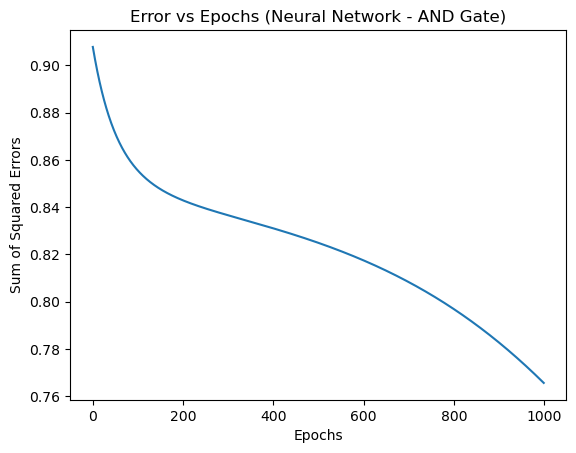

Final Weights from Input to Hidden Layer:
 [[-0.08265013 -0.71762859]
 [ 0.05700579  0.93234711]]
Final Weights from Hidden to Output Layer:
 [[-1.12614517]
 [-0.70299029]]


In [16]:
#A8
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function (used for backpropagation)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Training the neural network using backpropagation
def train_neural_network(X, y, hidden_layer_size=2, learning_rate=0.05, epochs=1000, convergence_threshold=0.002):
    np.random.seed(42)  # Set seed for reproducibility

    input_size = X.shape[1]
    output_size = 1

    # Initialize weights (random values)
    W1 = np.random.randn(input_size, hidden_layer_size)  # Weights for input to hidden layer
    W2 = np.random.randn(hidden_layer_size, output_size)  # Weights for hidden layer to output

    errors = []  # To store the sum of squared errors at each epoch

    for epoch in range(epochs):
        sum_squared_error = 0

        for i in range(X.shape[0]):
            # Forward pass
            hidden_input = np.dot(X[i], W1)
            hidden_output = sigmoid(hidden_input)

            final_input = np.dot(hidden_output, W2)
            final_output = sigmoid(final_input)

            # Calculate error (squared error)
            error = y[i] - final_output
            sum_squared_error += error ** 2

            # Backward pass (backpropagation)
            # Calculate gradients for W2 (hidden to output)
            delta_output = error * sigmoid_derivative(final_input)
            W2 += learning_rate * hidden_output[:, None] * delta_output

            # Calculate gradients for W1 (input to hidden)
            delta_hidden = delta_output * W2.T * sigmoid_derivative(hidden_input)
            W1 += learning_rate * X[i][:, None] * delta_hidden.T

        # Store the sum of squared errors
        errors.append(sum_squared_error)

        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f'Converged at epoch {epoch}')
            break

    return errors, W1, W2

# Plot the error vs epochs graph
def plot_error_vs_epochs(errors):
    plt.plot(errors)
    plt.title('Error vs Epochs (Neural Network - AND Gate)')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.show()

# AND gate dataset (input-output pairs)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # AND gate truth table

# Train the neural network
errors, W1_final, W2_final = train_neural_network(X, y)

# Plot the errors over epochs
plot_error_vs_epochs(errors)

# Print final weights
print("Final Weights from Input to Hidden Layer:\n", W1_final)
print("Final Weights from Hidden to Output Layer:\n", W2_final)


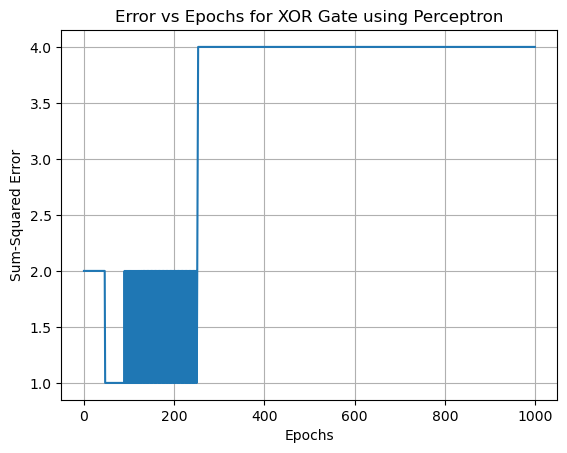

Final weights: [ 0.1 -0.1 -0.1]


In [17]:
#A9
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input and output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])

# Initial weights and parameters
W0 = 10    # Bias weight
W1 = 0.2   # Weight for input 1
W2 = -0.75 # Weight for input 2
learning_rate = 0.05
max_epochs = 1000
convergence_threshold = 0.002

# Activation function - Step Function
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron function
def perceptron_step(inputs, weights):
    return step_activation(np.dot(inputs, weights[1:]) + weights[0])

# Training function
def train_perceptron(inputs, outputs, learning_rate, max_epochs, threshold):
    weights = np.array([W0, W1, W2])
    epochs = 0
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            input_sample = inputs[i]
            expected_output = outputs[i]

            # Calculate prediction and error
            predicted_output = perceptron_step(input_sample, weights)
            error = expected_output - predicted_output
            total_error += error ** 2

            # Weight update rule
            weights[1:] += learning_rate * error * input_sample
            weights[0] += learning_rate * error  # Update bias

        epochs += 1
        errors.append(total_error)

        # Check for convergence
        if total_error <= threshold:
            print(f"Converged after {epochs} epochs.")
            break

    return weights, epochs, errors

# Train the perceptron on XOR gate logic
final_weights, epochs, error_list = train_perceptron(inputs, outputs, learning_rate, max_epochs, convergence_threshold)

# Plotting the errors over epochs
plt.plot(range(epochs), error_list)
plt.title('Error vs Epochs for XOR Gate using Perceptron')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.grid(True)
plt.show()

print(f"Final weights: {final_weights}")


Converged after 130 epochs.


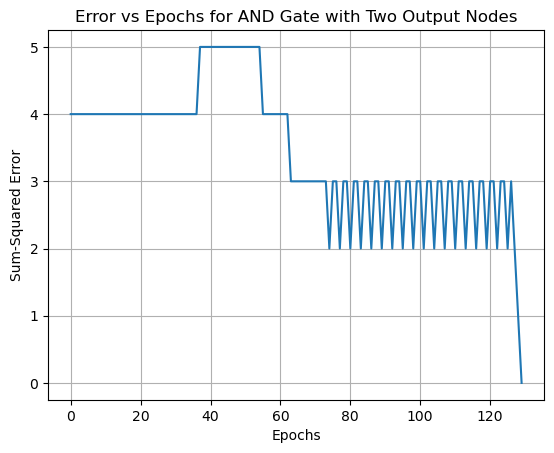

Final weights for two output nodes: [[ 6.85 -0.1 ]
 [-2.95  0.1 ]
 [-3.9   0.05]]


In [18]:
#A10
import numpy as np
import matplotlib.pyplot as plt

# AND gate input and output mapping
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Two output nodes

# Initial weights and parameters
W0 = np.array([10, 10])   # Bias weights for both outputs
W1 = np.array([0.2, 0.2]) # Weight for input 1 (for both output nodes)
W2 = np.array([-0.75, -0.75]) # Weight for input 2 (for both output nodes)
learning_rate = 0.05
max_epochs = 1000
convergence_threshold = 0.002

# Activation function - Step Function
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron function
def perceptron_step(inputs, weights, node):
    return step_activation(np.dot(inputs, weights[1:, node]) + weights[0, node])

# Training function
def train_perceptron_2_outputs(inputs, outputs, learning_rate, max_epochs, threshold):
    # Weights for two output nodes
    weights = np.array([W0, W1, W2])
    epochs = 0
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            input_sample = inputs[i]
            expected_output = outputs[i]

            for node in range(2):  # For both output nodes
                # Calculate prediction and error for each output node
                predicted_output = perceptron_step(input_sample, weights, node)
                error = expected_output[node] - predicted_output
                total_error += error ** 2

                # Weight update rule for the current output node
                weights[1:, node] += learning_rate * error * input_sample
                weights[0, node] += learning_rate * error  # Update bias

        epochs += 1
        errors.append(total_error)

        # Check for convergence
        if total_error <= threshold:
            print(f"Converged after {epochs} epochs.")
            break

    return weights, epochs, errors

# Train the perceptron on AND gate logic with two output nodes
final_weights, epochs, error_list = train_perceptron_2_outputs(inputs, outputs, learning_rate, max_epochs, convergence_threshold)

# Plotting the errors over epochs
plt.plot(range(epochs), error_list)
plt.title('Error vs Epochs for AND Gate with Two Output Nodes')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.grid(True)
plt.show()

print(f"Final weights for two output nodes: {final_weights}")


In [19]:
#A11
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# AND gate inputs and outputs
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_outputs = np.array([0, 0, 0, 1])  # Expected outputs for AND gate

# XOR gate inputs and outputs
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])  # Expected outputs for XOR gate

# Create and train MLPClassifier for AND Gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000, random_state=1)
mlp_and.fit(and_inputs, and_outputs)

# Create and train MLPClassifier for XOR Gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000, random_state=1)
mlp_xor.fit(xor_inputs, xor_outputs)

# Predict outputs for AND gate
and_predictions = mlp_and.predict(and_inputs)
print("AND Gate Predictions:", and_predictions)
print("AND Gate Accuracy:", accuracy_score(and_outputs, and_predictions))

# Predict outputs for XOR gate
xor_predictions = mlp_xor.predict(xor_inputs)
print("XOR Gate Predictions:", xor_predictions)
print("XOR Gate Accuracy:", accuracy_score(xor_outputs, xor_predictions))


AND Gate Predictions: [0 0 0 1]
AND Gate Accuracy: 1.0
XOR Gate Predictions: [0 1 0 1]
XOR Gate Accuracy: 0.5


In [21]:
#A12
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset and separate features and target
X = data.drop('LABEL', axis=1)  # Features
y = data['LABEL']  # Target (LABEL)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)

# Predict on test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Use zero_division=1 to handle the undefined metrics
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.6888888888888889
Classification Report:
               precision    recall  f1-score   support

        3333       0.53      0.60      0.56        15
        3334       0.93      1.00      0.96        13
        3335       0.86      0.80      0.83        15
        3337       0.64      1.00      0.78         7
        3342       0.70      0.64      0.67        22
        3343       1.00      0.00      0.00         1
        3346       0.91      0.83      0.87        12
        3349       0.47      0.47      0.47        30
        3350       1.00      0.00      0.00         1
        3351       0.30      1.00      0.47        10
        3352       1.00      0.00      0.00        19
        3353       0.94      0.84      0.89        19
        3354       0.65      0.50      0.56        22
        3355       1.00      0.00      0.00         1
        3356       0.75      0.86      0.80        14
        3357       1.00      0.00      0.00         1
        3358       1.00     